Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation
1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.metrics import confusion_matrix



In [4]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [7]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
data.age.value_counts()
pd.crosstab(data.target, data.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


In [10]:
pd.crosstab(x.sex,y)

target,0,1
sex,,
0,24,72
1,114,93


Text(0, 0.5, 'Amount')

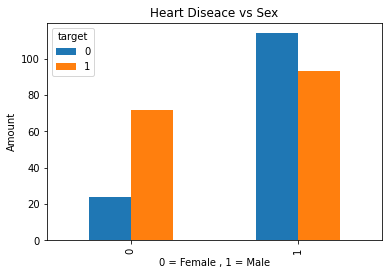

In [11]:
pd.crosstab(x.sex,y).plot.bar()
# plt.bar(x.sex,y) .... wrong method to plot for such a graph 
plt.title('Heart Diseace vs Sex')
plt.xlabel('0 = Female , 1 = Male')
plt.ylabel('Amount')

In [12]:
pd.crosstab(x.fbs,y)

target,0,1
fbs,,
0,116,142
1,22,23


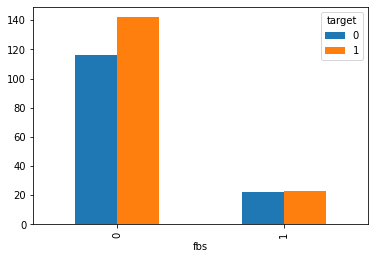

In [13]:
pd.crosstab(x.fbs,y).plot(kind='bar')

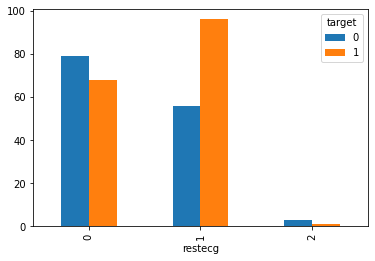

In [14]:
pd.crosstab(x.restecg,y).plot(kind='bar')

Comparing three diffrent variables including thhe target

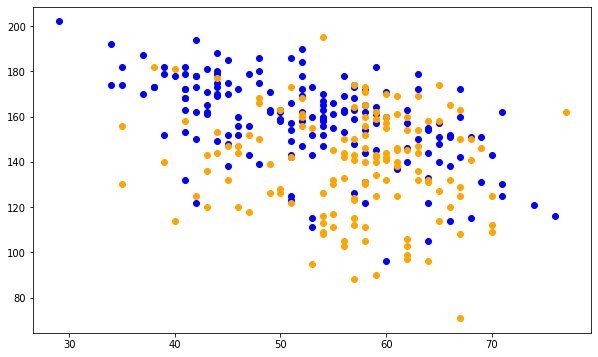

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x.age[y==1],
          x.thalach[y==1],c ='blue')
plt.scatter(x.age[y==0],
            x.thalach[y==0],c='orange')

Checking the distribution of age column

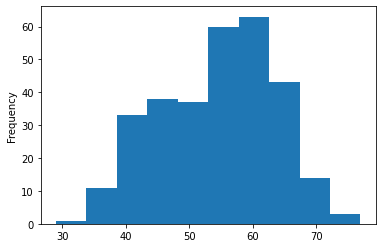

In [16]:
data.age.value_counts
# data.age.plot(kind='hist')
# or use 
data.age.plot.hist()

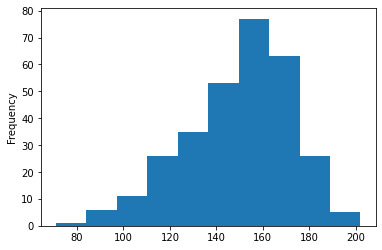

In [17]:
data.thalach.plot.hist()

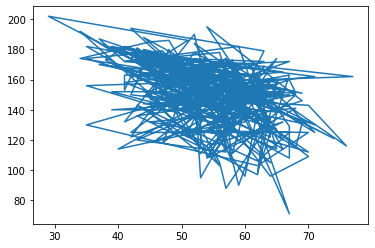

In [18]:
plt.plot(x.age,x.thalach)
plt.show()

In [19]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [20]:
pd.crosstab(x.cp,y)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


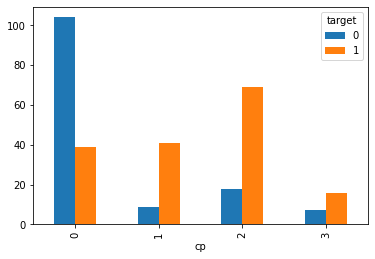

In [21]:
pd.crosstab(x.cp,y).plot(kind='bar')

Correlation matrix

In [22]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


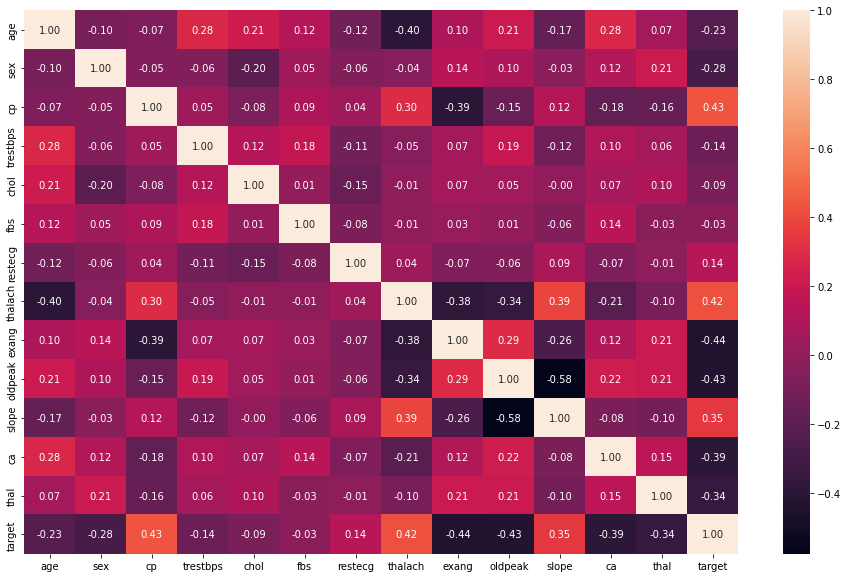

In [23]:
# corr_matrix = data.corr()
plt.figure(figsize=(16,10))
mefn=sns.heatmap(data.corr(),annot=True,fmt='.2f')


MACHINE LEARNING MODEL AND EVALUATION 

In [24]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,train_size=0.8)

In [25]:
x_test,x_train,y_test,y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 89    58    0   0       100   248    0        0      122      0      1.0   
 252   62    0   0       138   294    1        1      106      0      1.9   
 276   58    1   0       146   218    0        1      105      0      2.0   
 166   67    1   0       120   229    0        0      129      1      2.6   
 8     52    1   2       172   199    1        1      162      0      0.5   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 179   57    1   0       150   276    0        0      112      1      0.6   
 293   67    1   2       152   212    0        0      150      0      0.8   
 187   54    1   0       124   266    0        0      109      1      2.2   
 41    48    1   1       130   245    0        0      180      0      0.2   
 297   59    1   0       164   176    1        0       90      0      1.0   
 
      slope  ca  thal  
 89       1   0     2  
 252      1   3     2  
 2

Now we will use Machine Learning model to train and test the data

Three models to try
1. Logistic regression
2. K-nearest neighbours classifier
3. Random Forest Classifiers

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
y_pred_lr = lr.predict(x_test)
y_pred_lr 

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm1 = confusion_matrix(y_pred_lr,y_test)
cm1

array([[ 72,  18],
       [ 37, 115]])

In [29]:
lr_a_score = accuracy_score(y_pred_lr,y_test)
lr_a_score
# lr.score(x_test,y_test)

0.7727272727272727

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred_knn = knn.predict(x_test)
y_pred_knn
# knn.score(x_test,y_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [32]:
cm2 = confusion_matrix(y_pred_knn,y_test)
cm2

array([[ 57,  32],
       [ 52, 101]])

In [33]:
# knn_a_score = accuracy_score(y_pred_knn,y_test)
# knn_a_score
knn.score(x_test,y_test)

0.6528925619834711

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [36]:
cm3 = confusion_matrix(y_pred_rfc,y_test)
cm3

array([[ 73,  12],
       [ 36, 121]])

In [37]:
rfc_a_score = accuracy_score(y_pred_rfc,y_test)
rfc_a_score

0.8016528925619835

LIst of things that one must check for a certain model
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Croos - Validation
5. Precision
6. Recall
7. F1 Score
8. classification report
9. ROC curve
10. Area under the curve(AUC)

In [38]:
# Training KNN
test_scores = []
neighbors = range(1,21)
for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(x_train,y_train)
  y_pred_knn = knn.predict(x_test)
  test_scores.append(accuracy_score(y_test,y_pred_knn))

In [39]:
test_scores

[0.5991735537190083,
 0.628099173553719,
 0.628099173553719,
 0.6363636363636364,
 0.6528925619834711,
 0.640495867768595,
 0.6363636363636364,
 0.6363636363636364,
 0.6239669421487604,
 0.6322314049586777,
 0.6570247933884298,
 0.628099173553719,
 0.6115702479338843,
 0.6033057851239669,
 0.6157024793388429,
 0.6157024793388429,
 0.6239669421487604,
 0.6074380165289256,
 0.6074380165289256,
 0.6074380165289256]

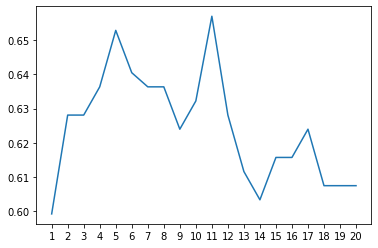

In [40]:
plt.plot(neighbors,test_scores)
plt.xticks(np.arange(1, 21, 1))
plt.show()

HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV:
1. Logistic Regression
2. Random forest classifier



In [41]:
# creating hyperparameter grid for logistic regression 

log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}
# hyperparameter grid for Randomforest

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting the hyperparameter for Logistic regression

rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [44]:
rs_log_reg.score(x_test,y_test)

0.7768595041322314

In [45]:
# from sklearn.model_selection import RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           verbose=True,
                           n_iter=20)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 310}

In [47]:
rs_rf.score(x_test,y_test)

0.8140495867768595

Hypertuning using GridSearchCV

In [48]:
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
gs_log_reg.score(x_test,y_test)

0.7603305785123967

Evaluating the Model

In [51]:
# Roc curve and AUC score
# Confusion matrix
# Claassification report
# Precision
# Recall
# F1-score
# Using cross validation wherever possible

In [52]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


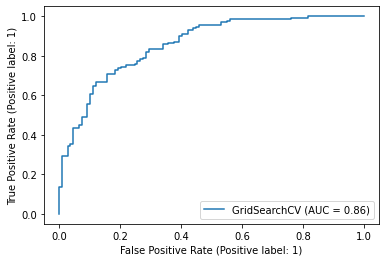

In [53]:
# plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test,y_test)

In [54]:
cm = confusion_matrix(y_test,y_preds)
print(cm)

[[ 66  43]
 [ 15 118]]


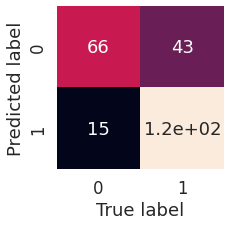

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Classification report and a cross-validated precision, recall and f1score

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69       109
           1       0.73      0.89      0.80       133

    accuracy                           0.76       242
   macro avg       0.77      0.75      0.75       242
weighted avg       0.77      0.76      0.75       242



In [57]:
# using cross validation for certain features:


In [58]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
clf = LogisticRegression(C= 0.38566204211634725, solver='liblinear')

In [60]:
# Cross-validated accuracy, precision, recall, F1_score
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_accuracy

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [61]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8380874316939891

In [62]:
from sklearn.model_selection import cross_val_score
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision

array([0.775     , 0.88235294, 0.85714286, 0.83783784, 0.725     ])

In [63]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [64]:
from sklearn.model_selection import cross_val_score
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

array([0.93939394, 0.90909091, 0.90909091, 0.93939394, 0.87878788])

In [65]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [66]:
from sklearn.model_selection import cross_val_score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

array([0.84931507, 0.89552239, 0.88235294, 0.88571429, 0.79452055])

In [67]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

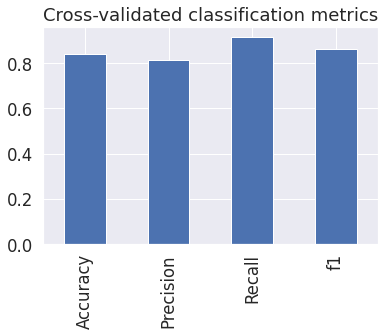

In [68]:
# Visualizing coss-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'f1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False)


###**We are getting an greater Recall score than 95% which is a very good value, and for other scores as well we are getting a scores greater than 80%.**

Feature Importance: Which features contributed to the output and how did they?

## **Feature Importance**
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model

In [72]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);
clf.coef_

array([[-0.00107706,  0.04048263,  0.83457088, -0.03365251, -0.00451482,
         0.07571205, -0.11007891,  0.04453717, -0.17286005, -0.44288576,
         0.21669826, -0.52389012, -0.32884822]])

In [73]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.0010770565563279128,
 'ca': -0.5238901223787575,
 'chol': -0.004514819456937843,
 'cp': 0.8345708820299605,
 'exang': -0.17286004809768363,
 'fbs': 0.07571204605544526,
 'oldpeak': -0.4428857577674454,
 'restecg': -0.1100789110356595,
 'sex': 0.040482630544412326,
 'slope': 0.2166982645959093,
 'thal': -0.3288482245868771,
 'thalach': 0.04453717195987863,
 'trestbps': -0.033652511702959104}

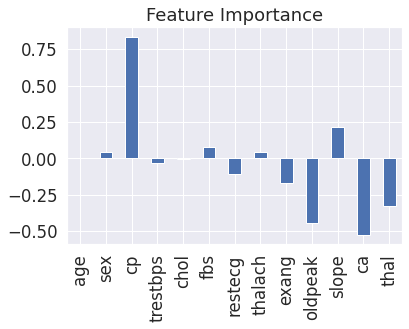

In [76]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

**Here we can see that our target is mostly affected by 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal'**

**Other features have very less effect on our target.**